<a href="https://colab.research.google.com/github/usnhee/TIL-/blob/master/Convnet_visual_hmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from keras.applications.vgg16 import VGG16
model= VGG16(weights='imagenet')

In [7]:
import tensorflow as tf 
#tf.compat.v1.disable_eager_execution()
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# dimensions of input image
img_width= 180 
img_height = 180

# target layer: will visualize the filters from this layer
layer_name= 'conv3_block4_out'

# build REsNet50V2 model loaded with pre-trained ImageNet weights
model= keras.applications.ResNet50V2(weights='imagenet', include_top=True)

#set up a model that returns the activation values for target layer 
layer= model.get_layer(name=layer_name)
feature_extractor= keras.Model(inputs=model.inputs, outputs=layer.output)


102883328/102869336 [==============================] - 1s 0us/step


In [23]:
# The local path to our target image
img_path = './doggy.png'
# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))
# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)
# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [24]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


Predicted: [('n02095314', 'wire-haired_fox_terrier', 0.38786143), ('n02091134', 'whippet', 0.083362475), ('n02089973', 'English_foxhound', 0.071984425)]


In [16]:
from keras import backend as K

In [25]:
tf.compat.v1.disable_eager_execution()
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


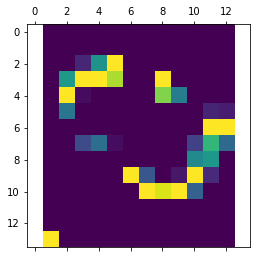

In [26]:
import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap, 0) 
heatmap /= np.max(heatmap, 0) 
plt.matshow(heatmap)

In [27]:
import cv2 

img = cv2.imread(img_path)
heatmap= cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255*heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('./result2.jpg', superimposed_img)

True

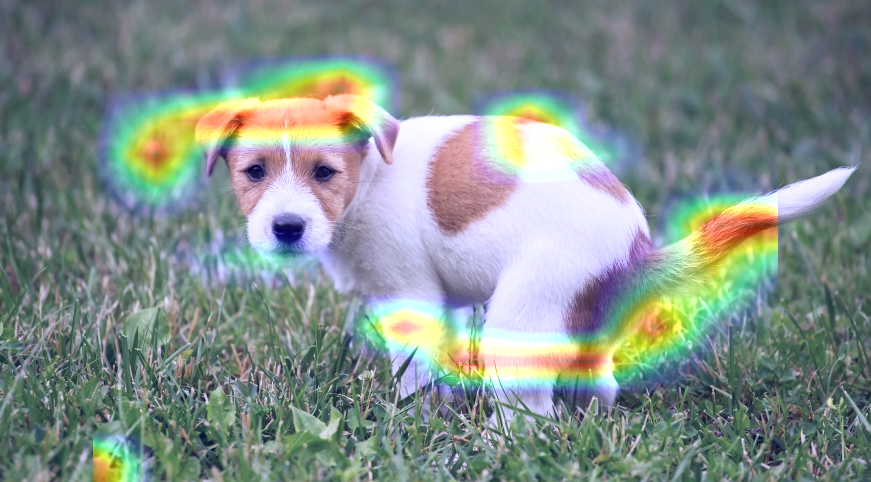

In [30]:
from google.colab.patches import cv2_imshow
cv2_imshow(superimposed_img)